### Libraries

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.utils import shuffle
import sklearn
from sklearn.preprocessing import MinMaxScaler

### Loading raw dataset temporal and spatial data nutrient pollution Thames River

In [3]:
df = pd.read_csv("test_steven_temporal.csv", usecols=["year", "Phosphate"])

In [4]:
df.head()

,year,Phosphate
0,2015,0.010
1,2015,0.075
2,2015,0.075
3,2015,0.150
4,2015,0.010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361 entries, 0 to 2360
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       2361 non-null   int64  
 1   Phosphate  2361 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 37.0 KB


In [6]:
training_set  = df.iloc[:, 1].values

In [7]:
x =training_set.reshape(-1, 1) 
min_max_scaler = MinMaxScaler()
training_set_scaled = min_max_scaler.fit_transform(x)

In [8]:
#Creating a window for previous data
def to_supervised(train):
    window_size = 4
    X = []
    Y = []
    for i in range(window_size, len(train)):
        X.append(train[i-window_size:i,:])
        Y.append(train[i,0:1])
    
    return X,Y

In [9]:
X, Y = to_supervised(training_set_scaled)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (2357, 1)
X (2357, 4, 1)


In [10]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(Y.shape[1]))

In [11]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 4, 32)             12416     
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 37665 (147.13 KB)
Trainable params: 37665 (147.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
history = model.fit(X, Y, epochs=500, batch_size=30, validation_split=0.1, verbose=1)

Epoch 1/500
71/71 [==============================] - 1s 4ms/step - loss: 0.0476 - val_loss: 0.0303
Epoch 2/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0444 - val_loss: 0.0307
Epoch 3/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0445 - val_loss: 0.0302
Epoch 4/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0443 - val_loss: 0.0308
Epoch 5/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0441 - val_loss: 0.0303
Epoch 6/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0440 - val_loss: 0.0302
Epoch 7/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0439 - val_loss: 0.0306
Epoch 8/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0437 - val_loss: 0.0303
Epoch 9/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0436 - val_loss: 0.0311
Epoch 10/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0436 - val_loss: 0.0303
Epoch 11/

71/71 [==============================] - 0s 2ms/step - loss: 0.0418 - val_loss: 0.0325
Epoch 84/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0417 - val_loss: 0.0322
Epoch 85/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0417 - val_loss: 0.0310
Epoch 86/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0418 - val_loss: 0.0314
Epoch 87/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0418 - val_loss: 0.0323
Epoch 88/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0419 - val_loss: 0.0313
Epoch 89/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0420 - val_loss: 0.0310
Epoch 90/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0418 - val_loss: 0.0313
Epoch 91/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0419 - val_loss: 0.0316
Epoch 92/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0418 - val_loss: 0.0317
Epoch 93/500


71/71 [==============================] - 0s 3ms/step - loss: 0.0413 - val_loss: 0.0319
Epoch 165/500
71/71 [==============================] - 0s 3ms/step - loss: 0.0413 - val_loss: 0.0321
Epoch 166/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0411 - val_loss: 0.0311
Epoch 167/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0413 - val_loss: 0.0312
Epoch 168/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0410 - val_loss: 0.0314
Epoch 169/500
71/71 [==============================] - 0s 3ms/step - loss: 0.0409 - val_loss: 0.0311
Epoch 170/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0412 - val_loss: 0.0309
Epoch 171/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0411 - val_loss: 0.0324
Epoch 172/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0410 - val_loss: 0.0318
Epoch 173/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0415 - val_loss: 0.0326
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.0398 - val_loss: 0.0309
Epoch 246/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0404 - val_loss: 0.0317
Epoch 247/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0398 - val_loss: 0.0314
Epoch 248/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0397 - val_loss: 0.0320
Epoch 249/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0394 - val_loss: 0.0312
Epoch 250/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0399 - val_loss: 0.0323
Epoch 251/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0396 - val_loss: 0.0318
Epoch 252/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0397 - val_loss: 0.0313
Epoch 253/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0394 - val_loss: 0.0321
Epoch 254/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0401 - val_loss: 0.0311
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.0381 - val_loss: 0.0315
Epoch 327/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0388 - val_loss: 0.0335
Epoch 328/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0381 - val_loss: 0.0316
Epoch 329/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0381 - val_loss: 0.0325
Epoch 330/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0383 - val_loss: 0.0316
Epoch 331/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0387 - val_loss: 0.0324
Epoch 332/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0388 - val_loss: 0.0331
Epoch 333/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0379 - val_loss: 0.0318
Epoch 334/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0380 - val_loss: 0.0338
Epoch 335/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0382 - val_loss: 0.0331
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.0369 - val_loss: 0.0328
Epoch 408/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0374 - val_loss: 0.0317
Epoch 409/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0379 - val_loss: 0.0324
Epoch 410/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0378 - val_loss: 0.0327
Epoch 411/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0370 - val_loss: 0.0319
Epoch 412/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0372 - val_loss: 0.0317
Epoch 413/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0373 - val_loss: 0.0321
Epoch 414/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0368 - val_loss: 0.0329
Epoch 415/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0367 - val_loss: 0.0323
Epoch 416/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0367 - val_loss: 0.0325
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.0361 - val_loss: 0.0327
Epoch 489/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0362 - val_loss: 0.0330
Epoch 490/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0362 - val_loss: 0.0332
Epoch 491/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0352 - val_loss: 0.0338
Epoch 492/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0356 - val_loss: 0.0337
Epoch 493/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0354 - val_loss: 0.0346
Epoch 494/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0361 - val_loss: 0.0327
Epoch 495/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0360 - val_loss: 0.0339
Epoch 496/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0365 - val_loss: 0.0327
Epoch 497/500
71/71 [==============================] - 0s 2ms/step - loss: 0.0358 - val_loss: 0.0321
Epoc

In [15]:

model.save('NN_PO4.h5')

In [16]:
result = model.predict(X)

74/74 [==============================] - 0s 837us/step


In [17]:
result

array([[0.11307181],
       [0.13735577],
       [0.20529747],
       ...,
       [0.13847397],
       [0.12818693],
       [0.08845071]], dtype=float32)

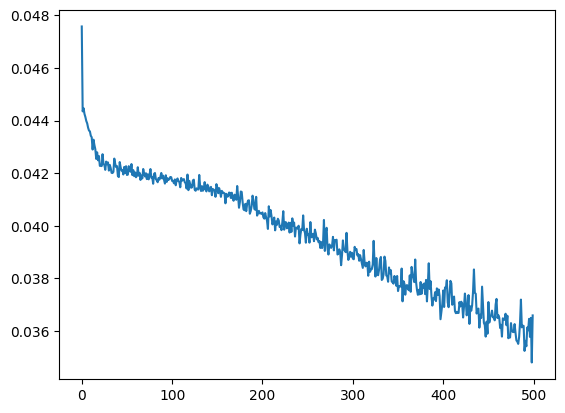

In [18]:
plt.plot(history.history['loss'])
plt.show()

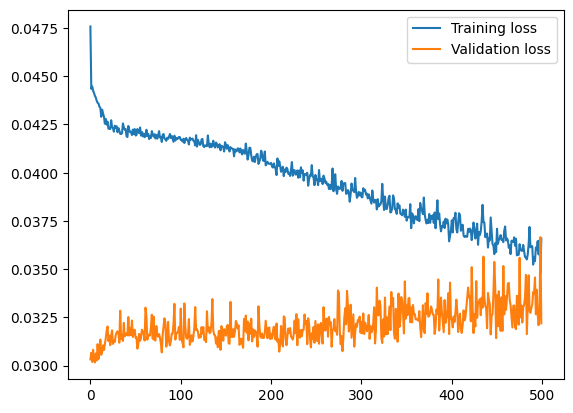

In [19]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [113]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (0, 4, 1)
X_test (2357, 4, 1)
Y_train (0, 1)
Y_test (2357, 1)


In [114]:

Y_pred = model.predict(X_test)

74/74 [==============================] - 0s 834us/step


In [115]:
print('y_predicted',Y_pred.shape)
#print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', training_set_scaled.shape)

y_predicted (2357, 1)
X_test (2357, 4, 1)
scaled Values shape (2361, 1)


In [137]:
d = training_set_scaled[:217,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d))
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test,d))
print('concat Y_test', Y_test.shape)

dummy (217, 1)
Y_pred (2357, 1)
concat y_pred (2357, 1)
concat Y_test (2357, 1)


In [141]:
Y_predicted = min_max_scaler.inverse_transform(Y_predicted)
Y_tested = min_max_scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (2574, 1)
Y_predicted (2574, 1)


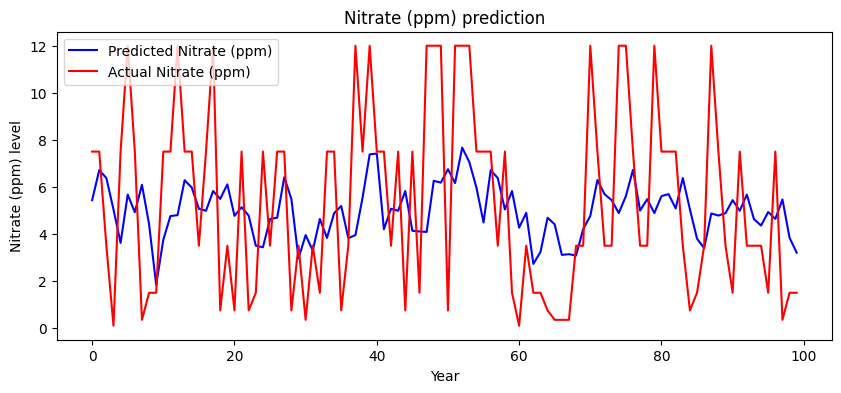

In [148]:
plt.figure(figsize=(10,4))  
plt.plot(Y_predicted[:100,:], color= 'blue',label = 'Predicted Nitrate (ppm)')
plt.plot(Y_tested[:100,:] , color = 'red',label = 'Actual Nitrate (ppm)')
plt.title("Nitrate (ppm) prediction")
plt.xlabel("Year")
plt.ylabel("Nitrate (ppm) level")
plt.legend()
plt.savefig('graph.svg',dpi=300)
plt.show()
